In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from prophet import Prophet
from prophet.plot import plot_plotly
import plotly.io as pio

In [2]:
df = pd.read_csv(r"C:\Users\Shravan Yadav\OneDrive\Desktop\Internship\Amazon Sales FY2020-21.csv", low_memory=False)
df

order_id  order_date      status  item_id                    sku  \
0       100354678  01/10/2020    received   574772     oasis_Oasis-064-36   
1       100354678  01/10/2020    received   574774        Fantastic_FT-48   
2       100354680  01/10/2020    complete   574777        mdeal_DMC-610-8   
3       100354680  01/10/2020    complete   574779     oasis_Oasis-061-36   
4       100367357  13/11/2020    received   595185    MEFNAR59C38B6CA08CD   
...           ...         ...         ...      ...                    ...   
286387  100562365  30/09/2021        paid   905179    APPCHA5AF14939B8F8A   
286388  100562376  30/09/2021         cod   905191    MEFCOT5A8D1E973B886   
286389  100562383  30/09/2021         cod   905200  WOFVAL59D5EA84167F9-M   
286390  100562384  30/09/2021         cod   905202  WOFNIG5B4D7EB0E9FDD-L   
286391  100562386  30/09/2021  processing   905205    MATHUA5AF70A7D1E50A   

        qty_ordered   price   value  discount_amount   total  ...  \
0                21    89.9  1798.0              0.0  1798.0  ...   
1                11    19.0   190.0              0.0   190.0  ...   
2                 9   149.9  1199.2              0.0  1199.2  ...   
3                 9    79.9   639.2              0.0   639.2  ...   
4                 2    99.9    99.9              0.0    99.9  ...   
...             ...     ...     ...              ...     ...  ...   
286387            2  4419.9  4419.9              0.0  4419.9  ...   
286388            2    39.9    39.9              0.0    39.9  ...   
286389            2    40.0    40.0              0.0    40.0  ...   
286390            2    49.9    49.9              0.0    49.9  ...   
286391            2  3559.9  3559.9              0.0  3559.9  ...   

       Sign in date    Phone No.      Place Name    County           City  \
0         8/22/2006  405-959-1129         Vinson    Harmon         Vinson   
1         8/22/2006  405-959-1129         Vinson    Harmon         Vinson   
2         8/22/2006  405-959-1129         Vinson    Harmon         Vinson   
3         8/22/2006  405-959-1129         Vinson    Harmon         Vinson   
4         8/22/2006  405-959-1129         Vinson    Harmon         Vinson   
...             ...           ...            ...       ...            ...   
286387    3/21/2007  212-772-7404      Rushville     Yates      Rushville   
286388   10/24/2011  229-817-9451  Lawrenceville  Gwinnett  Lawrenceville   
286389    7/25/1987  252-414-8396         Durham    Durham         Durham   
286390    7/25/1987  252-414-8396         Durham    Durham         Durham   
286391    1/28/2015  423-276-2699      Knoxville      Knox      Knoxville   

       State    Zip     Region    User Name Discount_Percent  
0         OK  73571      South      jwtitus              0.0  
1         OK  73571      South      jwtitus              0.0  
2         OK  73571      South      jwtitus              0.0  
3         OK  73571      South      jwtitus              0.0  
4         OK  73571      South      jwtitus              0.0  
...      ...    ...        ...          ...              ...  
286387    NY  14544  Northeast     bklatham              0.0  
286388    GA  30044      South   bmbrunetti              0.0  
286389    NC  27701      South     fngiusti              0.0  
286390    NC  27701      South     fngiusti              0.0  
286391    TN  37920      South  reschlosser              0.0  

[286392 rows x 35 columns]

In [3]:
df.head(5)

order_id  order_date    status  item_id                  sku  qty_ordered  \
0  100354678  01/10/2020  received   574772   oasis_Oasis-064-36           21   
1  100354678  01/10/2020  received   574774      Fantastic_FT-48           11   
2  100354680  01/10/2020  complete   574777      mdeal_DMC-610-8            9   
3  100354680  01/10/2020  complete   574779   oasis_Oasis-061-36            9   
4  100367357  13/11/2020  received   595185  MEFNAR59C38B6CA08CD            2   

   price   value  discount_amount   total  ... Sign in date    Phone No.   \
0   89.9  1798.0              0.0  1798.0  ...    8/22/2006  405-959-1129   
1   19.0   190.0              0.0   190.0  ...    8/22/2006  405-959-1129   
2  149.9  1199.2              0.0  1199.2  ...    8/22/2006  405-959-1129   
3   79.9   639.2              0.0   639.2  ...    8/22/2006  405-959-1129   
4   99.9    99.9              0.0    99.9  ...    8/22/2006  405-959-1129   

  Place Name  County    City State    Zip Region User Name Discount_Percent  
0     Vinson  Harmon  Vinson    OK  73571  South   jwtitus              0.0  
1     Vinson  Harmon  Vinson    OK  73571  South   jwtitus              0.0  
2     Vinson  Harmon  Vinson    OK  73571  South   jwtitus              0.0  
3     Vinson  Harmon  Vinson    OK  73571  South   jwtitus              0.0  
4     Vinson  Harmon  Vinson    OK  73571  South   jwtitus              0.0  

[5 rows x 35 columns]

In [4]:
df.tail(5)

order_id  order_date      status  item_id                    sku  \
286387  100562365  30/09/2021        paid   905179    APPCHA5AF14939B8F8A   
286388  100562376  30/09/2021         cod   905191    MEFCOT5A8D1E973B886   
286389  100562383  30/09/2021         cod   905200  WOFVAL59D5EA84167F9-M   
286390  100562384  30/09/2021         cod   905202  WOFNIG5B4D7EB0E9FDD-L   
286391  100562386  30/09/2021  processing   905205    MATHUA5AF70A7D1E50A   

        qty_ordered   price   value  discount_amount   total  ...  \
286387            2  4419.9  4419.9              0.0  4419.9  ...   
286388            2    39.9    39.9              0.0    39.9  ...   
286389            2    40.0    40.0              0.0    40.0  ...   
286390            2    49.9    49.9              0.0    49.9  ...   
286391            2  3559.9  3559.9              0.0  3559.9  ...   

       Sign in date    Phone No.      Place Name    County           City  \
286387    3/21/2007  212-772-7404      Rushville     Yates      Rushville   
286388   10/24/2011  229-817-9451  Lawrenceville  Gwinnett  Lawrenceville   
286389    7/25/1987  252-414-8396         Durham    Durham         Durham   
286390    7/25/1987  252-414-8396         Durham    Durham         Durham   
286391    1/28/2015  423-276-2699      Knoxville      Knox      Knoxville   

       State    Zip     Region    User Name Discount_Percent  
286387    NY  14544  Northeast     bklatham              0.0  
286388    GA  30044      South   bmbrunetti              0.0  
286389    NC  27701      South     fngiusti              0.0  
286390    NC  27701      South     fngiusti              0.0  
286391    TN  37920      South  reschlosser              0.0  

[5 rows x 35 columns]

In [5]:
df.shape

(286392, 35)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   item_id           286392 non-null  int64  
 4   sku               286392 non-null  object 
 5   qty_ordered       286392 non-null  int64  
 6   price             286392 non-null  float64
 7   value             286392 non-null  float64
 8   discount_amount   286392 non-null  float64
 9   total             286392 non-null  float64
 10  category          286392 non-null  object 
 11  payment_method    286392 non-null  object 
 12  bi_st             286392 non-null  object 
 13  cust_id           286392 non-null  int64  
 14  year              286392 non-null  int64  
 15  month             286392 non-null  object 
 16  ref_num           28

In [7]:
df.describe()

item_id    qty_ordered          price          value  \
count  286392.000000  286392.000000  286392.000000  286392.000000   
mean   741664.902131       3.011296     851.385253     885.879934   
std     95746.031827       4.573837    1741.750751    2073.252179   
min    574769.000000       1.000000       0.000000       0.000000   
25%    659684.500000       2.000000      49.900000      49.900000   
50%    742309.000000       2.000000     119.000000     158.970000   
75%    826124.250000       3.000000     950.000000     910.000000   
max    905208.000000     501.000000  101262.590000  101262.590000   

       discount_amount          total        cust_id           year  \
count    286392.000000  286392.000000  286392.000000  286392.000000   
mean         70.039427     815.840507   70048.019054    2020.618778   
std         256.880870    1983.580302   30243.856395       0.485688   
min           0.000000       0.000000       4.000000    2020.000000   
25%           0.000000      49.900000   56519.000000    2020.000000   
50%           0.000000     149.800000   74225.500000    2021.000000   
75%          18.383050     800.000000   92357.000000    2021.000000   
max       30213.150000  101262.590000  115326.000000    2021.000000   

             ref_num            age            Zip  Discount_Percent  
count  286392.000000  286392.000000  286392.000000     286392.000000  
mean   560853.663395      46.489033   49723.160015          6.069079  
std    255828.418398      16.673288   27597.198873         10.100100  
min    111127.000000      18.000000     210.000000          0.000000  
25%    341265.000000      32.000000   26571.750000          0.000000  
50%    564857.000000      47.000000   49316.000000          0.000000  
75%    781086.000000      61.000000   72645.000000         11.000000  
max    999981.000000      75.000000   99950.000000         75.000000

In [8]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True, errors='coerce') #Convert order_date to datetime

In [9]:
df.isnull().sum()

order_id            0
order_date          0
status              0
item_id             0
sku                 0
qty_ordered         0
price               0
value               0
discount_amount     0
total               0
category            0
payment_method      0
bi_st               0
cust_id             0
year                0
month               0
ref_num             0
Name Prefix         0
First Name          0
Middle Initial      0
Last Name           0
Gender              0
age                 0
full_name           0
E Mail              0
Sign in date        0
Phone No.           0
Place Name          0
County              0
City                0
State               0
Zip                 0
Region              0
User Name           0
Discount_Percent    0
dtype: int64

In [10]:
df = df.dropna(subset=['order_id', 'order_date', 'cust_id'])  # Important columns

In [11]:
df=df[df['status'].str.lower().isin(['received','complete'])]

In [12]:
df['calculated_total'] = df['qty_ordered'] * df['price']

In [13]:
df = df[(df['qty_ordered'] > 0) & (df['price'] > 0)]       #remove zero qyt and prices

In [14]:
df['calculated_total'] = df['qty_ordered'] * df['price']

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df['category'] = df['category'].str.strip().str.lower()
df['payment_method'] = df['payment_method'].str.strip().str.lower()

In [17]:
df.head(5)

order_id order_date    status  item_id                  sku  qty_ordered  \
0  100354678 2020-10-01  received   574772   oasis_Oasis-064-36           21   
1  100354678 2020-10-01  received   574774      Fantastic_FT-48           11   
2  100354680 2020-10-01  complete   574777      mdeal_DMC-610-8            9   
3  100354680 2020-10-01  complete   574779   oasis_Oasis-061-36            9   
4  100367357 2020-11-13  received   595185  MEFNAR59C38B6CA08CD            2   

   price   value  discount_amount   total  ...    Phone No.  Place Name  \
0   89.9  1798.0              0.0  1798.0  ...  405-959-1129     Vinson   
1   19.0   190.0              0.0   190.0  ...  405-959-1129     Vinson   
2  149.9  1199.2              0.0  1199.2  ...  405-959-1129     Vinson   
3   79.9   639.2              0.0   639.2  ...  405-959-1129     Vinson   
4   99.9    99.9              0.0    99.9  ...  405-959-1129     Vinson   

   County    City  State    Zip  Region User Name Discount_Percent  \
0  Harmon  Vinson     OK  73571   South   jwtitus              0.0   
1  Harmon  Vinson     OK  73571   South   jwtitus              0.0   
2  Harmon  Vinson     OK  73571   South   jwtitus              0.0   
3  Harmon  Vinson     OK  73571   South   jwtitus              0.0   
4  Harmon  Vinson     OK  73571   South   jwtitus              0.0   

  calculated_total  
0           1887.9  
1            209.0  
2           1349.1  
3            719.1  
4            199.8  

[5 rows x 36 columns]

In [18]:
df.columns = [col.strip().title() for col in df.columns]

df.columns.tolist()

['Order_Id',
 'Order_Date',
 'Status',
 'Item_Id',
 'Sku',
 'Qty_Ordered',
 'Price',
 'Value',
 'Discount_Amount',
 'Total',
 'Category',
 'Payment_Method',
 'Bi_St',
 'Cust_Id',
 'Year',
 'Month',
 'Ref_Num',
 'Name Prefix',
 'First Name',
 'Middle Initial',
 'Last Name',
 'Gender',
 'Age',
 'Full_Name',
 'E Mail',
 'Sign In Date',
 'Phone No.',
 'Place Name',
 'County',
 'City',
 'State',
 'Zip',
 'Region',
 'User Name',
 'Discount_Percent',
 'Calculated_Total']

In [19]:
df['State'].value_counts()

State
CA    8814
TX    8505
NY    7532
PA    6956
IL    6894
OH    4924
FL    4918
MO    4582
VA    4265
IA    3790
MN    3712
MI    3596
NC    3566
KY    3496
GA    3299
WV    3170
IN    2975
WI    2814
AL    2732
MA    2567
TN    2447
OK    2428
NJ    2422
KS    2384
AR    2301
LA    2300
CO    2185
MD    2105
WA    1971
AZ    1926
NE    1865
SC    1856
MS    1683
OR    1534
SD    1529
NM    1524
MT    1512
CT    1475
UT    1344
ME    1266
ND    1179
AK    1156
VT    1115
ID    1101
DC     923
NV     899
NH     883
WY     740
HI     412
DE     373
RI     280
Name: count, dtype: int64

In [20]:
df.head(5)

Order_Id Order_Date    Status  Item_Id                  Sku  Qty_Ordered  \
0  100354678 2020-10-01  received   574772   oasis_Oasis-064-36           21   
1  100354678 2020-10-01  received   574774      Fantastic_FT-48           11   
2  100354680 2020-10-01  complete   574777      mdeal_DMC-610-8            9   
3  100354680 2020-10-01  complete   574779   oasis_Oasis-061-36            9   
4  100367357 2020-11-13  received   595185  MEFNAR59C38B6CA08CD            2   

   Price   Value  Discount_Amount   Total  ...     Phone No. Place Name  \
0   89.9  1798.0              0.0  1798.0  ...  405-959-1129     Vinson   
1   19.0   190.0              0.0   190.0  ...  405-959-1129     Vinson   
2  149.9  1199.2              0.0  1199.2  ...  405-959-1129     Vinson   
3   79.9   639.2              0.0   639.2  ...  405-959-1129     Vinson   
4   99.9    99.9              0.0    99.9  ...  405-959-1129     Vinson   

   County    City  State    Zip  Region User Name Discount_Percent  \
0  Harmon  Vinson     OK  73571   South   jwtitus              0.0   
1  Harmon  Vinson     OK  73571   South   jwtitus              0.0   
2  Harmon  Vinson     OK  73571   South   jwtitus              0.0   
3  Harmon  Vinson     OK  73571   South   jwtitus              0.0   
4  Harmon  Vinson     OK  73571   South   jwtitus              0.0   

  Calculated_Total  
0           1887.9  
1            209.0  
2           1349.1  
3            719.1  
4            199.8  

[5 rows x 36 columns]

In [21]:
df.to_csv('cleaned_data.csv', index=False)

In [22]:
##############    Sales Trend Analysis               #####################

In [23]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True, errors='coerce') #Convert order_date to datetime

In [24]:
#What is the total revenue for each month and year?
import calendar
df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True)

df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month_name()

total_revenue = df.groupby(['Year', 'Month'])['Total'].sum().reset_index()

total_revenue

Year      Month         Total
0   2020   December  3.062139e+07
1   2020   November  2.982381e+06
2   2020    October  1.182184e+06
3   2021      April  1.597372e+07
4   2021     August  2.295983e+06
5   2021   February  1.239291e+06
6   2021    January  2.435169e+06
7   2021       July  2.989111e+06
8   2021       June  7.286318e+06
9   2021      March  1.280989e+07
10  2021        May  2.459964e+06
11  2021  September  1.976108e+06

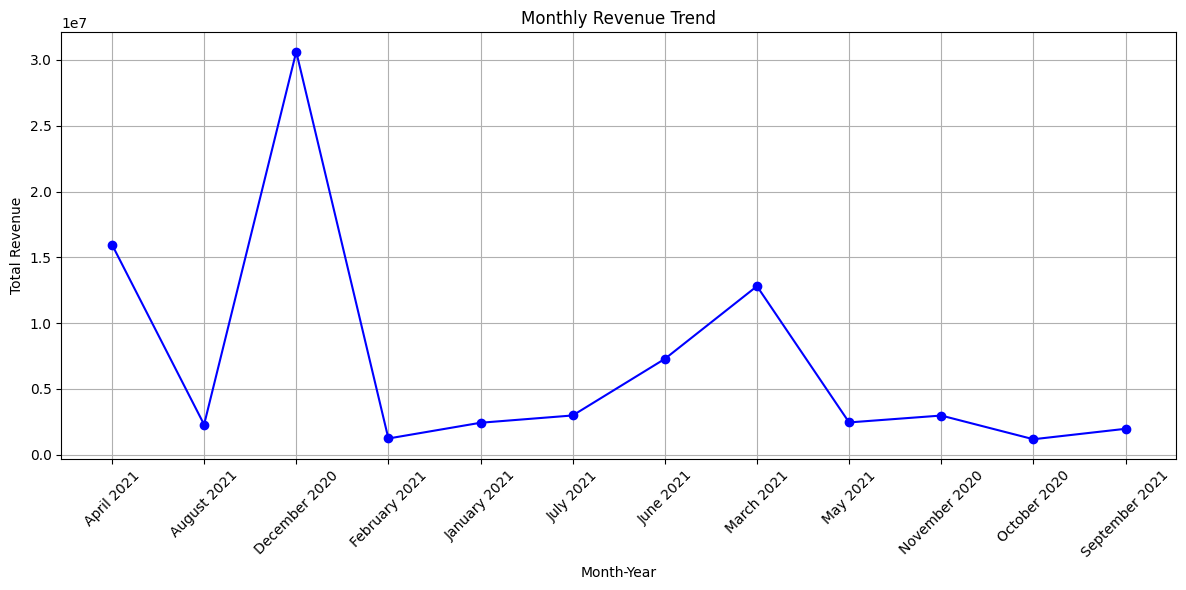

In [25]:
#Line charts for monthly and yearly sales trends
df['Month'] = pd.Categorical(df['Month'], categories=list(calendar.month_name)[1:], ordered=True)

df['Month_Year'] = df['Month'].astype(str) + ' ' + df['Year'].astype(str)

df['Month_Num'] = df['Month'].apply(lambda x: list(calendar.month_name).index(x))
df = df.sort_values(['Year', 'Month_Num'])


monthly_revenue = df.groupby('Month_Year')['Total'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['Month_Year'], monthly_revenue['Total'], marker='o', color='blue')

plt.title('Monthly Revenue Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
#Which are the best-performing and worst-performing months based on sales?
# highest revenue
best_month = total_revenue.loc[total_revenue['Total'].idxmax()]

# lowest revenue
worst_month = total_revenue.loc[total_revenue['Total'].idxmin()]

print("Best-performing month:",best_month)

print("\n")

print("Worst-performing month:",worst_month)

Best-performing month: Year               2020
Month          December
Total    30621390.94053
Name: 0, dtype: object


Worst-performing month: Year              2020
Month          October
Total    1182183.85886
Name: 2, dtype: object


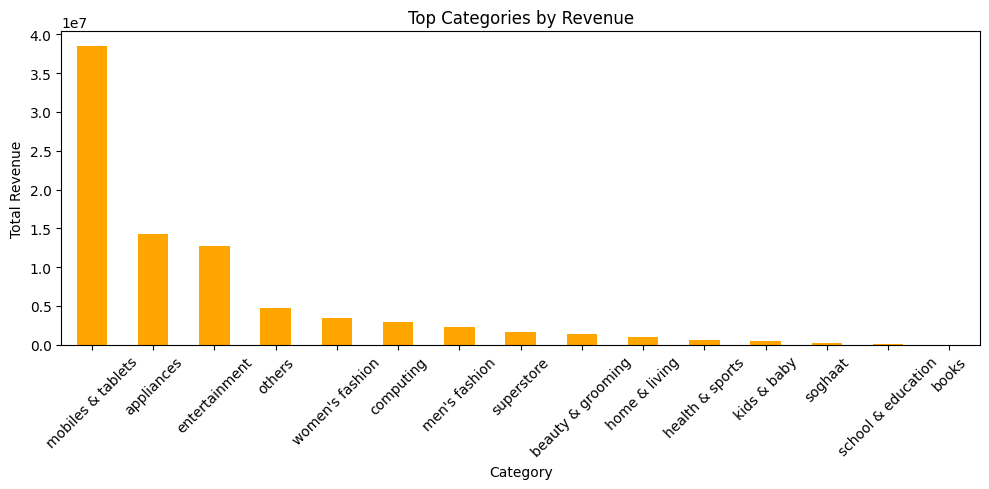

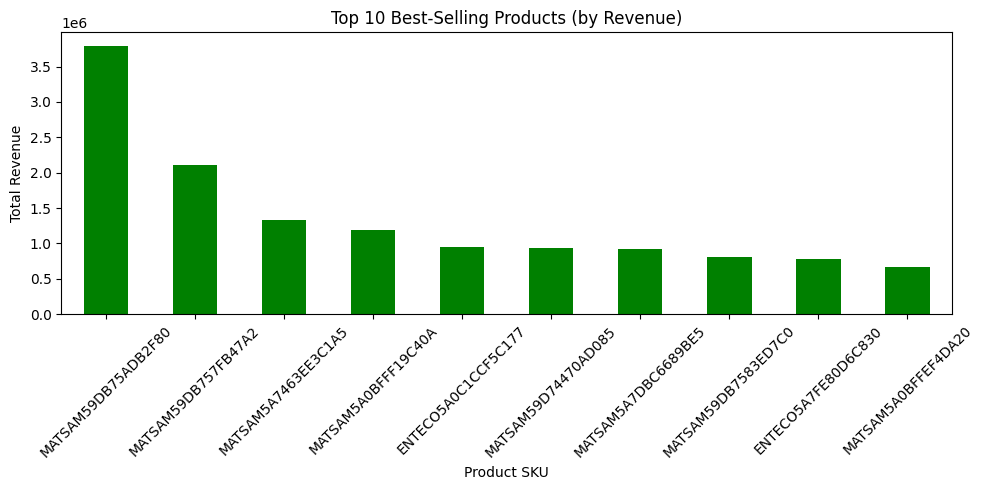

In [27]:
#Bar charts for best-selling products and categories.

# Total Revenue by Category
category_revenue = df.groupby('Category')['Total'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 5))
category_revenue.plot(kind='bar', color='orange')
plt.title('Top Categories by Revenue')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top_products = df.groupby('Sku')['Total'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
top_products.plot(kind='bar', color='green')
plt.title('Top 10 Best-Selling Products (by Revenue)')
plt.xlabel('Product SKU')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




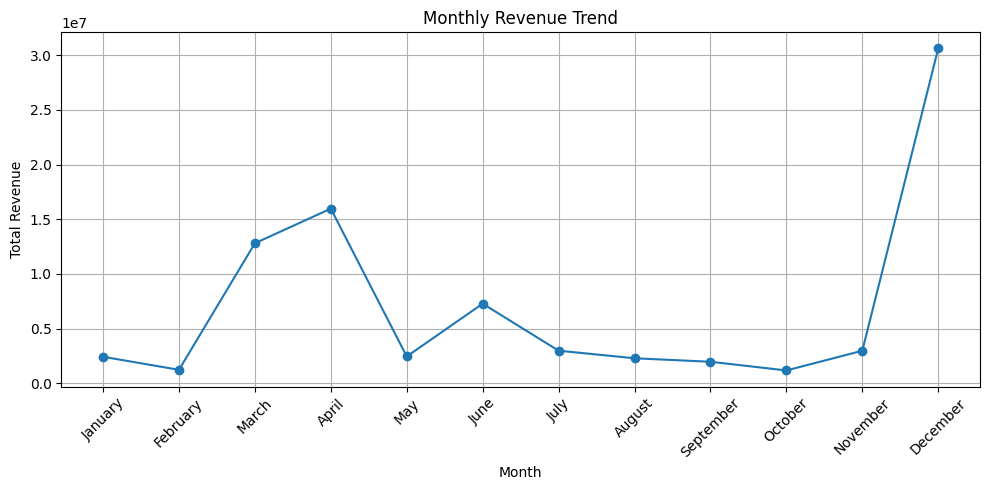

In [28]:
#Are there any seasonal patterns like Diwali, Christmas, or New Year sales spikes? - 
#Diwali	- October–November
#Christmas - December
#New Year - December–January

df['Month_Num'] = df['Order_Date'].dt.month
df['Month_Name'] = df['Order_Date'].dt.month_name()

monthly_revenue = df.groupby(['Month_Num', 'Month_Name'])['Total'].sum().reset_index()
monthly_revenue = monthly_revenue.sort_values('Month_Num')

# Plot
plt.figure(figsize=(10, 5))
plt.plot(monthly_revenue['Month_Name'], monthly_revenue['Total'], marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Year              2020
Month          October
Total    1182183.85886
Name: 2, dtype: object


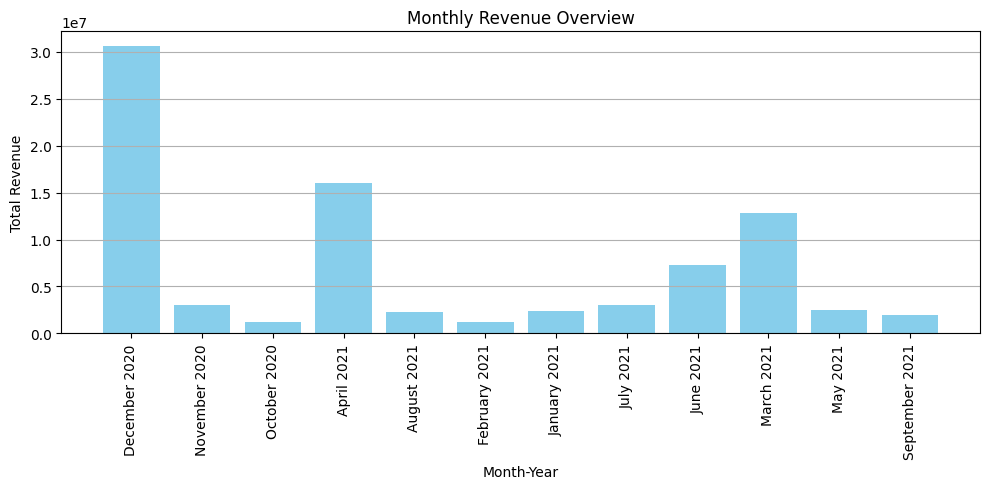

In [29]:
#Are there months showing declining or slow sales?

decline_months = total_revenue.loc[total_revenue['Total'].idxmin()]
print(decline_months)

#plot
plt.figure(figsize=(10, 5))
plt.bar(total_revenue['Month'] + " " + total_revenue['Year'].astype(str), total_revenue['Total'], color='skyblue')
plt.xticks(rotation=90)
plt.title("Monthly Revenue Overview")
plt.xlabel("Month-Year")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.grid(axis='y')
plt.show()


The total revenue for each year is:
    Year         Total
0  2020  3.478596e+07
1  2021  4.946556e+07


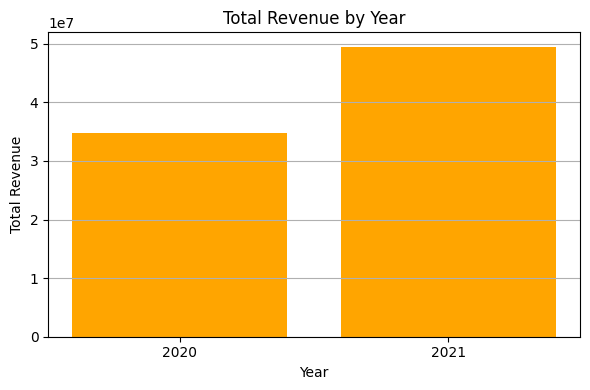

In [30]:
#What is the total revenue for each year?

total_revenue_year = df.groupby('Year')['Total'].sum().reset_index()
print("The total revenue for each year is:\n", total_revenue_year)

plt.figure(figsize=(6, 4))
plt.bar(total_revenue_year['Year'].astype(str), total_revenue_year['Total'], color='orange')
plt.title("Total Revenue by Year")
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

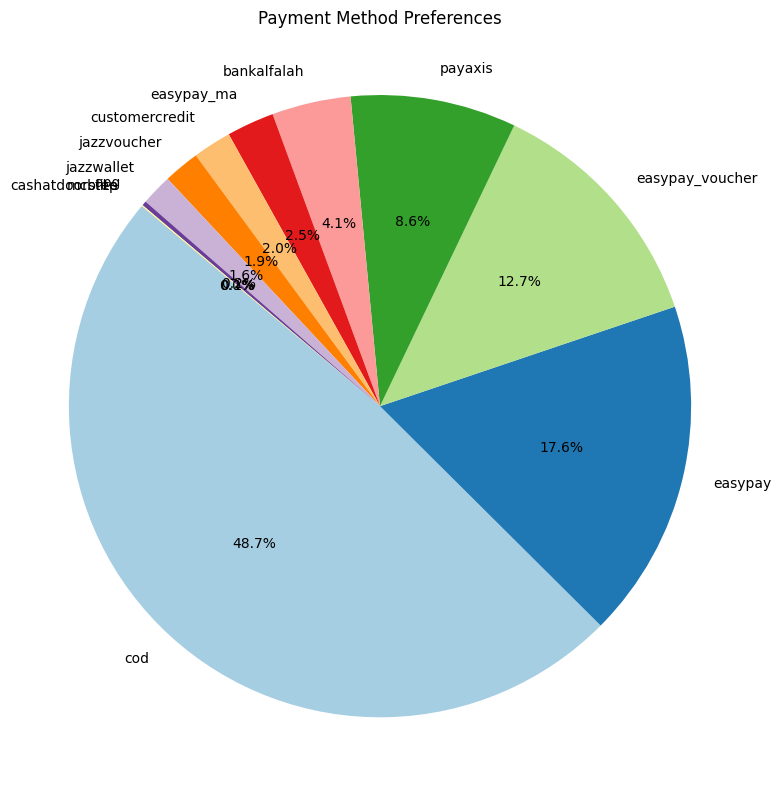

In [31]:
# Payment method preferences
df['Payment_Method'] = df['Payment_Method'].str.strip().str.lower()
payment_counts = df['Payment_Method'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Payment Method Preferences")
plt.axis('equal')  # Ensures pie is a circle
plt.tight_layout()
plt.show()

In [32]:
#Is the yearly sales trend showing growth or stagnation?

yearly_revenue = df.groupby('Year')['Total'].sum().reset_index()
print(yearly_revenue)

yearly_revenue['Growth (%)'] = yearly_revenue['Total'].pct_change() * 100
print(yearly_revenue)

   Year         Total
0  2020  3.478596e+07
1  2021  4.946556e+07
   Year         Total  Growth (%)
0  2020  3.478596e+07         NaN
1  2021  4.946556e+07   42.199792


In [33]:
#What strategies can boost sales during low-performing months?
df['Month'] = pd.Categorical(df['Month'], categories=list(calendar.month_name)[1:], ordered=True)


monthly_revenue = df.groupby('Month', observed=False)['Total'].sum().reset_index().sort_values('Total')
low_months = monthly_revenue.head(3)
print("Low-performing months:")
print(low_months)

Low-performing months:
       Month         Total
9    October  1.182184e+06
1   February  1.239291e+06
8  September  1.976108e+06


In [34]:
#task 2

In [35]:
#What are the column names in the dataset that represent Product Name and Product Category?
print("Product Category: Category")
print("Product Name: Sku")

Product Category: Category
Product Name: Sku


In [36]:
#What is the total quantity sold for each product?
total_Qty = df.groupby('Sku')['Qty_Ordered'].sum()
print('total quantity sold for each product:',total_Qty)

total quantity sold for each product: Sku
4U_Service_22                           3
7CF5AFBC3B16A32A                       11
ABR5AE2FBE29498D                        2
ABT_AUV140-32G-RBE-32GB-UV-140          2
ABT_G100s                               2
                                       ..
vitamin_moments-delay-wipes             8
vitamin_moments-silver-delay-condom     2
xiaomi_mi-c3-32gb-Gold                  2
xiaomi_mi-c3-32gb-Grey                  2
zaffiro_Z-P-018                         2
Name: Qty_Ordered, Length: 33825, dtype: int64


In [37]:
#What is the total revenue generated for each product?
total_rev = df.groupby('Sku')['Total'].sum().reset_index().sort_values(by='Total', ascending=False)
print('total revenue generated for each product:',total_rev)
print(total_rev.head(10))

total revenue generated for each product:                          Sku         Total
17159    MATSAM59DB75ADB2F80  3.795236e+06
17151    MATSAM59DB757FB47A2  2.108596e+06
17306    MATSAM5A7463EE3C1A5  1.332735e+06
17192    MATSAM5A0BFFF19C40A  1.185710e+06
8224     ENTECO5A0C1CCF5C177  9.466437e+05
...                      ...           ...
31140  WOFMAU5A004234766B0-S  0.000000e+00
8359     ENTLOU5A9E3978D9933  0.000000e+00
8290     ENTHAI5A60501F2D4FF  0.000000e+00
8282     ENTHAI59BBE1ABDF63B  0.000000e+00
11869    HASBRA5A71BF976C6EA  0.000000e+00

[33825 rows x 2 columns]
                       Sku         Total
17159  MATSAM59DB75ADB2F80  3.795236e+06
17151  MATSAM59DB757FB47A2  2.108596e+06
17306  MATSAM5A7463EE3C1A5  1.332735e+06
17192  MATSAM5A0BFFF19C40A  1.185710e+06
8224   ENTECO5A0C1CCF5C177  9.466437e+05
17145  MATSAM59D74470AD085  9.365082e+05
17343  MATSAM5A7DBC6689BE5  9.135468e+05
17152  MATSAM59DB7583ED7C0  8.005712e+05
8235   ENTECO5A7FE80D6C830  7.732417e+05
17190 

In [38]:
#How do sales aggregate at the category level?
category_sales = df.groupby('Category')[['Qty_Ordered', 'Total']].sum().reset_index().sort_values(by='Total', ascending=False)
print(category_sales)

              Category  Qty_Ordered         Total
9    mobiles & tablets        59671  3.844882e+07
0           appliances        44383  1.421036e+07
4        entertainment        17110  1.274149e+07
10              others        31565  4.714358e+06
14     women's fashion        43730  3.500712e+06
3            computing         9866  2.907841e+06
8        men's fashion        54162  2.281599e+06
13          superstore        63032  1.607902e+06
1    beauty & grooming        42657  1.440600e+06
6        home & living        24672  9.913531e+05
5      health & sports        19813  5.822973e+05
7          kids & baby        12172  4.818328e+05
12             soghaat        16220  2.756544e+05
11  school & education         2152  5.332524e+04
2                books          383  1.336678e+04


In [39]:
#Which products have the highest sales volume (based on quantity sold)?
prod_highest_sale = df.groupby('Sku')['Qty_Ordered'].sum().reset_index().sort_values(by='Qty_Ordered', ascending=False)
print('products have the highest sales volume:',prod_highest_sale)
print(prod_highest_sale.head(10))

products have the highest sales volume:                        Sku  Qty_Ordered
17159  MATSAM59DB75ADB2F80         6239
14876     KNO59D64DAF36939         4529
26170     VIT5ABCCF7FDF973         3948
14875     KNO59D64DAC18B6C         3179
1641   APPNAT5A0A01860CE92         2092
...                    ...          ...
732    APPDAW59DB86F485C3D            1
733    APPDAW59DF1C58AD159            1
728    APPDAW59DB864084124            1
729    APPDAW59DB864370E42            1
798    APPDAW5A004070534E1            1

[33825 rows x 2 columns]
                       Sku  Qty_Ordered
17159  MATSAM59DB75ADB2F80         6239
14876     KNO59D64DAF36939         4529
26170     VIT5ABCCF7FDF973         3948
14875     KNO59D64DAC18B6C         3179
1641   APPNAT5A0A01860CE92         2092
4841   BAGLUX5A099F4E3D5CF         1853
4840   BAGLUX5A099F4DDC6A7         1825
3661   BAGDOV5A099F4EF3FFA         1770
17306  MATSAM5A7463EE3C1A5         1629
17726  MATTEL5A462528E403F         1609


In [40]:
#Which products have the highest revenue?
prod_highest_rev = df.groupby('Sku')['Total'].sum().reset_index().sort_values(by='Total', ascending=False)
print('products have the highest revenue:',prod_highest_rev)
print(prod_highest_rev.head(5))

products have the highest revenue:                          Sku         Total
17159    MATSAM59DB75ADB2F80  3.795236e+06
17151    MATSAM59DB757FB47A2  2.108596e+06
17306    MATSAM5A7463EE3C1A5  1.332735e+06
17192    MATSAM5A0BFFF19C40A  1.185710e+06
8224     ENTECO5A0C1CCF5C177  9.466437e+05
...                      ...           ...
31140  WOFMAU5A004234766B0-S  0.000000e+00
8359     ENTLOU5A9E3978D9933  0.000000e+00
8290     ENTHAI5A60501F2D4FF  0.000000e+00
8282     ENTHAI59BBE1ABDF63B  0.000000e+00
11869    HASBRA5A71BF976C6EA  0.000000e+00

[33825 rows x 2 columns]
                       Sku         Total
17159  MATSAM59DB75ADB2F80  3.795236e+06
17151  MATSAM59DB757FB47A2  2.108596e+06
17306  MATSAM5A7463EE3C1A5  1.332735e+06
17192  MATSAM5A0BFFF19C40A  1.185710e+06
8224   ENTECO5A0C1CCF5C177  9.466437e+05


In [41]:
#How does each product's revenue contribute to the overall revenue (percentage-wise)?
total_rev = df['Total'].sum()
prod_rev = df.groupby('Sku')['Total'].sum().reset_index().sort_values(by='Total', ascending=False)

prod_rev['Revenue_Percent'] = (prod_rev['Total'] / total_rev) * 100

print("Top 5 Products by Revenue Contribution (%):\n", prod_rev.head(5))

Top 5 Products by Revenue Contribution (%):
                        Sku         Total  Revenue_Percent
17159  MATSAM59DB75ADB2F80  3.795236e+06         4.504651
17151  MATSAM59DB757FB47A2  2.108596e+06         2.502740
17306  MATSAM5A7463EE3C1A5  1.332735e+06         1.581853
17192  MATSAM5A0BFFF19C40A  1.185710e+06         1.407346
8224   ENTECO5A0C1CCF5C177  9.466437e+05         1.123593


In [42]:
#Which category generated the most revenue?
categ_most_revenue = df.groupby('Category')['Total'].sum().sort_values(ascending=False)
print("Category that generated the most revenue:\n", categ_most_revenue.head(1))

Category that generated the most revenue:
 Category
mobiles & tablets    3.844882e+07
Name: Total, dtype: float64


In [43]:
#Which category had the highest total quantity sold?
categ_highest_Qty_sold = df.groupby('Category')['Qty_Ordered'].sum().sort_values(ascending=False)
print("Category had the highest Quantity Sold:\n", categ_highest_Qty_sold.head(5))

Category had the highest Quantity Sold:
 Category
superstore           63032
mobiles & tablets    59671
men's fashion        54162
appliances           44383
women's fashion      43730
Name: Qty_Ordered, dtype: int64


In [44]:
#What is the average revenue per product in each category?
product_revenue = df.groupby(['Category', 'Sku'])['Total'].sum().reset_index()
avg_revenue = product_revenue.groupby('Category')['Total'].mean().sort_values(ascending=False)
print("The average revenue per product in each category:\n", avg_revenue.head(5))

The average revenue per product in each category:
 Category
others               23690.241095
entertainment        16356.212903
mobiles & tablets    11584.459210
appliances            5388.835950
computing             2964.160495
Name: Total, dtype: float64


In [45]:
#Are there any products with high sales volume but low revenue, or vice versa?
prod_analysis = df.groupby('Sku')[['Qty_Ordered', 'Total']].sum().reset_index()

# Products with high sales volume but low revenue
print("High quantity, low revenue:\n", prod_analysis.sort_values(by='Qty_Ordered', ascending=False).head(20).sort_values(by='Total').head())

# Products with high revenue but low sales volume
print("\nHigh revenue, low quantity:\n", prod_analysis.sort_values(by='Total', ascending=False).head(20).sort_values(by='Qty_Ordered').head())

High quantity, low revenue:
                     Sku  Qty_Ordered        Total
24800  RAF59D64DB567970          909   5978.31925
14875  KNO59D64DAC18B6C         3179   7310.66834
26189  VIT5AC4A6F2D60CC         1024   8800.00000
14876  KNO59D64DAF36939         4529  10871.86802
24838  ROO5AE983F167CA8         1358  21143.34150

High revenue, low quantity:
                        Sku  Qty_Ordered      Total
17470  MATSAM5B10F7E2AC8C1           93  663694.20
17343  MATSAM5A7DBC6689BE5          191  913546.82
17152  MATSAM59DB7583ED7C0          230  800571.20
17145  MATSAM59D74470AD085          273  936508.20
8596   ENTSON59FABFAA3E9F9          279  495548.50


In [46]:
#Are there underperforming categories with low sales or low revenue share?
category_analysis = df.groupby('Category')[['Qty_Ordered', 'Total']].sum().reset_index()

#Category with low revenue
low_revenue_categ = category_analysis.sort_values(by='Total').head()

#Category with low sales
low_qty_categ = category_analysis.sort_values(by='Qty_Ordered').head()

print("Categories with lowest total revenue:\n", low_revenue_categ)
print("\nCategories with lowest quantity sold:\n", low_qty_categ)

Categories with lowest total revenue:
               Category  Qty_Ordered         Total
2                books          383   13366.77800
11  school & education         2152   53325.24032
12             soghaat        16220  275654.38526
7          kids & baby        12172  481832.79228
5      health & sports        19813  582297.32315

Categories with lowest quantity sold:
               Category  Qty_Ordered         Total
2                books          383  1.336678e+04
11  school & education         2152  5.332524e+04
3            computing         9866  2.907841e+06
7          kids & baby        12172  4.818328e+05
12             soghaat        16220  2.756544e+05


In [47]:
#Task 3 Geographic Sales Performance

In [48]:
#What is the total revenue (Total) generated in each State and City?


total_revenue_state = df.groupby('State')['Total'].sum().sort_values(ascending=False)
print("Total Revenue by State:\n")
print(total_revenue_state)

print("\n" + "="*50 + "\n")

total_revenue_city = df.groupby('City')['Total'].sum().sort_values(ascending=False)
print("Total Revenue by City:\n")
print(total_revenue_city)

Total Revenue by State:

State
CA    6.043161e+06
TX    5.269219e+06
NY    4.509602e+06
PA    4.107567e+06
FL    3.320426e+06
OH    2.765760e+06
IL    2.692005e+06
MO    2.594994e+06
VA    2.582596e+06
IA    2.404491e+06
KY    2.321546e+06
NC    2.262419e+06
MI    2.107641e+06
WV    2.009114e+06
MN    1.967465e+06
GA    1.933735e+06
WI    1.884617e+06
MS    1.710815e+06
MA    1.669748e+06
TN    1.580330e+06
IN    1.574223e+06
AL    1.543683e+06
NJ    1.494335e+06
OK    1.436133e+06
KS    1.429727e+06
LA    1.380532e+06
CO    1.329298e+06
WA    1.261134e+06
AR    1.256512e+06
MD    1.254565e+06
AZ    1.169184e+06
SC    1.052019e+06
NE    1.039829e+06
CT    9.050291e+05
ND    8.999735e+05
MT    8.899346e+05
UT    8.385832e+05
NM    7.905132e+05
OR    7.870183e+05
AK    7.455123e+05
ME    7.435913e+05
ID    7.207963e+05
SD    6.708954e+05
VT    6.438583e+05
NH    6.105936e+05
NV    5.856814e+05
DC    5.042517e+05
WY    2.901164e+05
DE    2.791671e+05
HI    2.020126e+05
RI    1.855583e+05


In [49]:
df.columns

Index(['Order_Id', 'Order_Date', 'Status', 'Item_Id', 'Sku', 'Qty_Ordered',
       'Price', 'Value', 'Discount_Amount', 'Total', 'Category',
       'Payment_Method', 'Bi_St', 'Cust_Id', 'Year', 'Month', 'Ref_Num',
       'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'Gender',
       'Age', 'Full_Name', 'E Mail', 'Sign In Date', 'Phone No.', 'Place Name',
       'County', 'City', 'State', 'Zip', 'Region', 'User Name',
       'Discount_Percent', 'Calculated_Total', 'Month_Year', 'Month_Num',
       'Month_Name'],
      dtype='object')

In [50]:
#Which are the top 5 cities/states by: Total revenue? , Number of orders?

top_5_city_state_total_rev = df.groupby(['City','State'])['Total'].sum().sort_values(ascending=False)
print("The top 5 cities/states by: Total revenue:\n")
print(top_5_city_state_total_rev.head(5))

top_5_city_state_order_count = df.groupby(['City', 'State'])['Order_Id'].nunique().sort_values(ascending=False)
print("\nTop 5 Cities/States by Number of Orders:\n")
print(top_5_city_state_order_count.head(5))

The top 5 cities/states by: Total revenue:

City           State
Washington     DC       500264.14700
Houston        TX       350436.58104
Noxapater      MS       337407.21000
New York City  NY       308815.39410
Atlanta        GA       296845.37904
Name: Total, dtype: float64

Top 5 Cities/States by Number of Orders:

City           State
Dekalb         IL       768
Washington     DC       594
Houston        TX       431
New York City  NY       415
Atlanta        GA       338
Name: Order_Id, dtype: int64


In [51]:
#Which are the bottom 5 cities/states by: Total revenue? , Number of orders?

bottom_5_city_state_total_rev = df.groupby(['City','State'])['Total'].sum().sort_values(ascending=False)
print("The bottom 5 cities/states by: Total revenue:\n")
print(bottom_5_city_state_total_rev.tail(5))

bottom_5_city_state_order_count = df.groupby(['City', 'State'])['Order_Id'].nunique().sort_values(ascending=False)
print("\nThe bottom 5 Cities/States by Number of Orders:\n")
print(bottom_5_city_state_order_count.tail(5))

The bottom 5 cities/states by: Total revenue:

City        State
Bly         OR       0.0
Woodbine    NJ       0.0
Woodbridge  CA       0.0
Statham     GA       0.0
Darby       MT       0.0
Name: Total, dtype: float64

The bottom 5 Cities/States by Number of Orders:

City        State
Zachary     LA       1
Zachow      WI       1
Zamora      CA       1
Zanesfield  OH       1
Zarephath   NJ       1
Name: Order_Id, dtype: int64


In [52]:
#Do urban cities (e.g., Mumbai, Delhi, Bangalore) show higher sales than others?
city_type_orders = df.groupby('City')['Order_Id'].nunique()
print("\n Number of Orders by City:\n")
print(city_type_orders)

city_type_revenue = df.groupby('City')['Total'].sum()
print(" Total Revenue by City:\n")
print(city_type_revenue)


 Number of Orders by City:

City
Aaron            1
Aaronsburg       1
Abbeville       14
Abbotsford       2
Abbott           8
                ..
Zullinger        1
Zumbro Falls     6
Zuni             3
Zwingle          1
Zwolle           8
Name: Order_Id, Length: 13511, dtype: int64
 Total Revenue by City:

City
Aaron             655.000
Aaronsburg        109.900
Abbeville       32284.460
Abbotsford        282.820
Abbott           1933.800
                  ...    
Zullinger         250.000
Zumbro Falls     5473.464
Zuni              276.700
Zwingle           139.900
Zwolle          34328.670
Name: Total, Length: 13511, dtype: float64


In [53]:
#Top States/Cities by Number of Customers

top_states_by_customers = df.groupby('State')['Cust_Id'].nunique().sort_values(ascending=False)
print("Top States by Number of Unique Customers:\n", top_states_by_customers.head())


top_cities_by_customers = df.groupby('City')['Cust_Id'].nunique().sort_values(ascending=False)
print("\nTop Cities by Number of Unique Customers:\n", top_cities_by_customers.head())

Top States by Number of Unique Customers:
 State
CA    2761
TX    2670
NY    2224
PA    2147
FL    1539
Name: Cust_Id, dtype: int64

Top Cities by Number of Unique Customers:
 City
Washington       329
Houston          204
New York City    170
El Paso          156
Atlanta          134
Name: Cust_Id, dtype: int64


In [54]:
# Top States/Cities by Revenue per Customer (Avg Order Value)

aov_by_state = df.groupby('State')['Total'].mean().sort_values(ascending=False)
print("\nTop States by Average Order Value:\n", aov_by_state.head())

aov_by_city = df.groupby('City')['Total'].mean().sort_values(ascending=False)
print("\nTop Cities by Average Order Value:\n", aov_by_city.head())


Top States by Average Order Value:
 State
MS    1016.526950
ND     763.336281
DE     748.437295
NH     691.498975
CA     685.632060
Name: Total, dtype: float64

Top Cities by Average Order Value:
 City
Constableville    22399.80
Jackhorn          22399.80
Matheny           19362.00
Carlstadt         17820.80
Oaktown           17249.94
Name: Total, dtype: float64


In [55]:
#In which states do specific categories (Category) sell more?

top_states_per_category = df.groupby(['State', 'Category'])['Total'].sum().reset_index().sort_values(['Category', 'Total'], ascending=[True, False])
print("Top Selling States for Each Category:\n")
print(top_states_per_category.head(10))

Top Selling States for Each Category:

    State    Category         Total
60     CA  appliances  1.132402e+06
636    TX  appliances  9.133699e+05
563    PA  appliances  8.034858e+05
503    NY  appliances  7.324282e+05
134    FL  appliances  6.744988e+05
666    VA  appliances  4.751167e+05
177    IA  appliances  4.565080e+05
518    OH  appliances  4.485109e+05
206    IL  appliances  4.437966e+05
354    MO  appliances  4.300903e+05


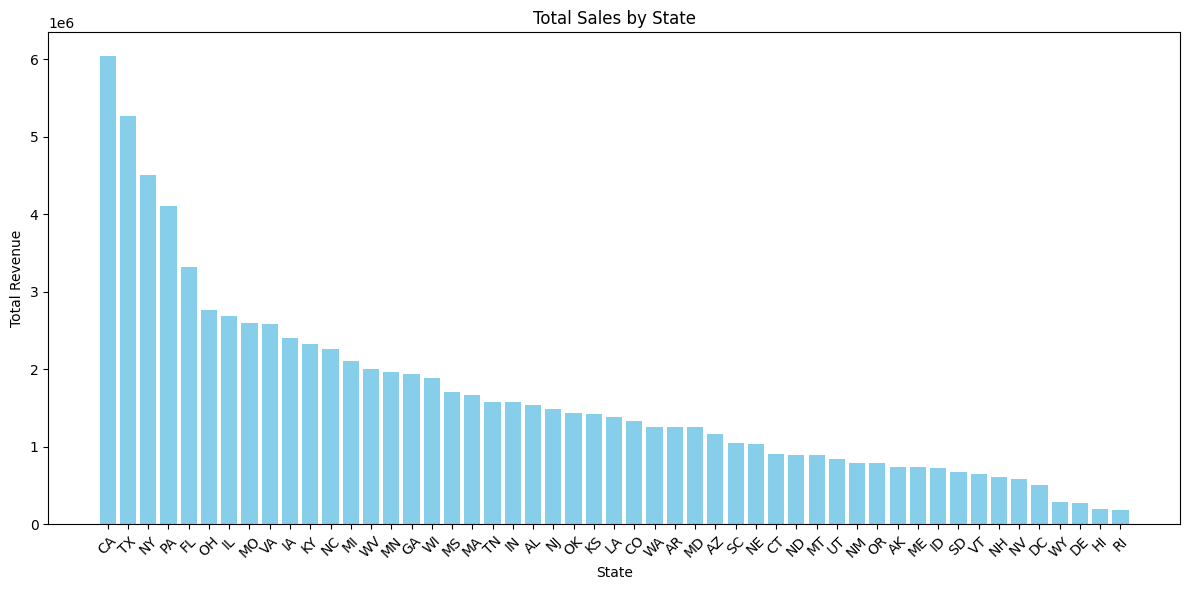

In [56]:
#Can we create a  bar chart of total sales by State?

state_sales = df.groupby('State')['Total'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(state_sales.index, state_sales.values, color='skyblue')
plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

   Region  Year  Month_Num         Total  Sales_Change_%    Trend
38   West  2020         12  5.630488e+06      862.379018   Growth
39   West  2021          1  4.471635e+05      -92.058174  Decline
40   West  2021          2  3.096260e+05      -30.757774  Decline
41   West  2021          3  2.366289e+06      664.240989   Growth
42   West  2021          4  2.863031e+06       20.992478   Growth
43   West  2021          5  4.413087e+05      -84.585962  Decline
44   West  2021          6  1.525562e+06      245.690304   Growth
45   West  2021          7  5.716228e+05      -62.530337  Decline
46   West  2021          8  3.404914e+05      -40.434244  Decline
47   West  2021          9  3.560465e+05        4.568412   Growth


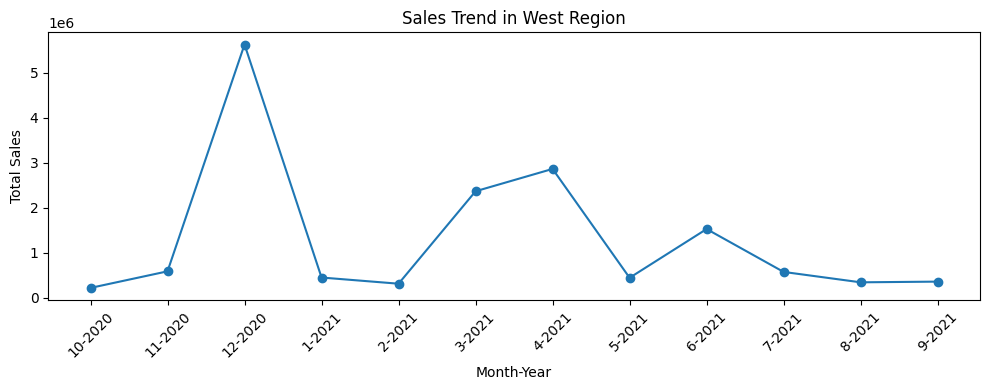

In [57]:
#Which regions show: Growth in sales (compare across months/years)? ,Decline in sales?

region_month_sales = df.groupby(['Region', 'Year', 'Month_Num'])['Total'].sum().reset_index()
region_month_sales = region_month_sales.sort_values(['Region', 'Year', 'Month_Num'])
region_month_sales['Sales_Change_%'] = region_month_sales.groupby('Region')['Total'].pct_change() * 100
region_month_sales['Trend'] = region_month_sales['Sales_Change_%'].apply(
    lambda x: 'Growth' if x > 0 else ('Decline' if x < 0 else 'No Change')
)
print(region_month_sales.tail(10))

region_to_plot = 'West'
region_data = region_month_sales[region_month_sales['Region'] == region_to_plot].copy()
region_data['Month_Year'] = region_data['Month_Num'].astype(str) + '-' + region_data['Year'].astype(str)

plt.figure(figsize=(10, 4))
plt.plot(region_data['Month_Year'], region_data['Total'], marker='o')
plt.title(f'Sales Trend in {region_to_plot} Region')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 Sales per Million People in Each Region:

  Region   Total_Sales  Population_Millions  Sales_per_Million_People
0  South  3.169706e+07                  200             158485.308420
1   West  1.565295e+07                  180              86960.809592


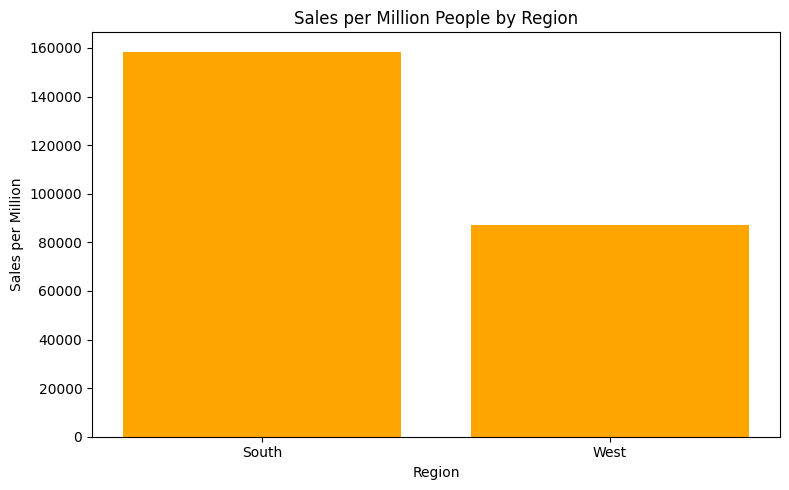

In [58]:
#Are sales proportional to each region's market size or population (external data)?

region_sales = df.groupby('Region')['Total'].sum().reset_index()
region_sales.columns = ['Region', 'Total_Sales']

region_population = pd.DataFrame({
    'Region': ['North', 'South', 'East', 'West'],
    'Population_Millions': [150, 200, 100, 180]  
})

merged = pd.merge(region_sales, region_population, on='Region')
merged['Sales_per_Million_People'] = merged['Total_Sales'] / merged['Population_Millions']

print(" Sales per Million People in Each Region:\n")
print(merged.sort_values(by='Sales_per_Million_People', ascending=False))


plt.figure(figsize=(8,5))
plt.bar(merged['Region'], merged['Sales_per_Million_People'], color='orange')
plt.title('Sales per Million People by Region')
plt.ylabel('Sales per Million')
plt.xlabel('Region')
plt.tight_layout()
plt.show()

Areas with Low Sales Despite High Population:

  Region   Total_Sales  Population_Millions  Sales_per_Million
1   West  1.565295e+07                  180       86960.809592
0  South  3.169706e+07                  200      158485.308420


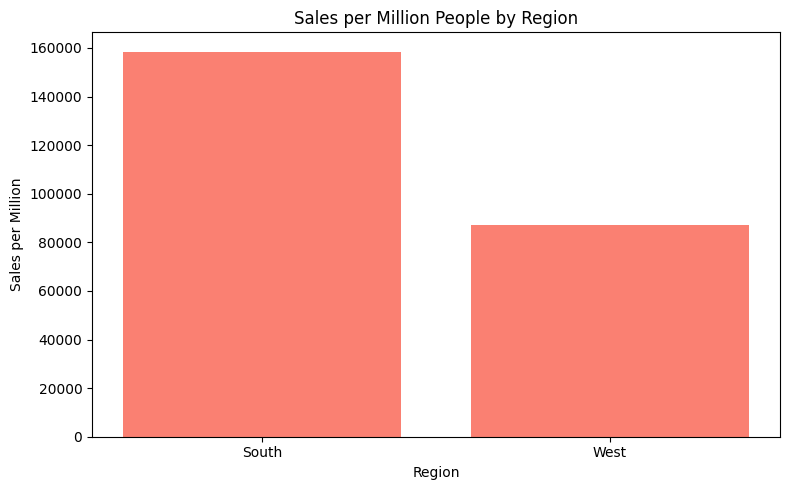

In [59]:
#Which areas show low sales despite high population?

region_sales = df.groupby('Region')['Total'].sum().reset_index()
region_sales.columns = ['Region', 'Total_Sales']

region_population = pd.DataFrame({
    'Region': ['North', 'South', 'East', 'West'],
    'Population_Millions': [150, 200, 100, 180]  
})

merged = pd.merge(region_sales, region_population, on='Region')
merged['Sales_per_Million'] = merged['Total_Sales'] / merged['Population_Millions']

underperforming = merged.sort_values(by='Sales_per_Million')
print("Areas with Low Sales Despite High Population:\n")
print(underperforming)



plt.figure(figsize=(8,5))
plt.bar(merged['Region'], merged['Sales_per_Million'], color='salmon')
plt.title('Sales per Million People by Region')
plt.ylabel('Sales per Million')
plt.xlabel('Region')
plt.tight_layout()
plt.show()

In [60]:
 ######    Customer segemntation using RFM analysis        #######

In [61]:
df.columns.tolist()

['Order_Id',
 'Order_Date',
 'Status',
 'Item_Id',
 'Sku',
 'Qty_Ordered',
 'Price',
 'Value',
 'Discount_Amount',
 'Total',
 'Category',
 'Payment_Method',
 'Bi_St',
 'Cust_Id',
 'Year',
 'Month',
 'Ref_Num',
 'Name Prefix',
 'First Name',
 'Middle Initial',
 'Last Name',
 'Gender',
 'Age',
 'Full_Name',
 'E Mail',
 'Sign In Date',
 'Phone No.',
 'Place Name',
 'County',
 'City',
 'State',
 'Zip',
 'Region',
 'User Name',
 'Discount_Percent',
 'Calculated_Total',
 'Month_Year',
 'Month_Num',
 'Month_Name']

In [62]:

#Choose a Reference Date
reference_date = pd.to_datetime('2021-10-01')

# Group Data by Customer ID
rfm = df.groupby('Cust_Id').agg({
    'Order_Date': lambda x: (reference_date - x.max()).days,
    'Order_Id': 'nunique',
    'Total': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

#Normalize and Rank RFM Scores

rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1]).astype(int)
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5]).astype(int)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5]).astype(int)

rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

print(rfm.head())


   CustomerID  Recency  Frequency  Monetary  R_Score  F_Score  M_Score  \
0           4       17         15  21282.35        5        5        5   
1          15      232          3    216.80        3        4        3   
2          20       64          6  22565.60        5        5        5   
3          21      240          1    105.00        3        1        2   
4          23       55          2    393.24        5        4        3   

  RFM_Score  
0       555  
1       343  
2       555  
3       312  
4       543  


In [63]:
#Interpret the RFM Segments

def segment_customer(score):
    if score == '555':
        return 'Best Customer'
    elif score[0] == '5':
        return 'Recent Customer'
    elif score[1] == '5':
        return 'Loyal Customer'
    elif score[2] == '5':
        return 'Big Spender'
    elif score.startswith('1') or score.startswith('2'):
        return 'At-Risk'
    elif score == '111':
        return 'Lost'
    else:
        return 'Others'


rfm['Segment'] = rfm['RFM_Score'].apply(segment_customer)

In [64]:
# Document Key Insights

segment_counts = rfm['Segment'].value_counts()

print("Customer Counts by Segment:")
print(segment_counts)


rfm.head(10)

Customer Counts by Segment:
Segment
At-Risk            12991
Others             12175
Recent Customer     6878
Loyal Customer      5705
Big Spender         2685
Best Customer       1577
Name: count, dtype: int64


CustomerID  Recency  Frequency   Monetary  R_Score  F_Score  M_Score  \
0           4       17         15  21282.350        5        5        5   
1          15      232          3    216.800        3        4        3   
2          20       64          6  22565.600        5        5        5   
3          21      240          1    105.000        3        1        2   
4          23       55          2    393.240        5        4        3   
5          28      349          1     70.000        1        1        1   
6          32       13         97  47835.190        5        5        5   
7          33       47         49  32907.731        5        5        5   
8          41      317          1    219.900        1        1        3   
9          44      111          3   4143.379        5        4        5   

  RFM_Score          Segment  
0       555    Best Customer  
1       343           Others  
2       555    Best Customer  
3       312           Others  
4       543  Recent Customer  
5       111          At-Risk  
6       555    Best Customer  
7       555    Best Customer  
8       113          At-Risk  
9       545  Recent Customer

In [65]:
#Define Customer Segments Based on RFM Scores

def segment_customer(score):
    if score == '555':
        return 'High-Value Customer'
    elif score[0] == '5' and score[1] in ['4', '5']:
        return 'Potential Loyalist'
    elif score[1] in ['4', '5'] and score[0] in ['3', '4']:
        return 'Loyal Customer'
    elif score[0] in ['1', '2'] and score[1] in ['3', '4', '5']:
        return 'At-Risk Customer'
    elif score[0] == '5' and score[1] == '1':
        return 'New Customer'
    elif score == '111':
        return 'Lost Customer'
    else:
        return 'Others'

In [66]:
#Assign Customers to Each Segment
rfm['Segment'] = rfm['RFM_Score'].apply(segment_customer)

In [67]:
#Analyze Customer Behavior
# Count how many customers are in each segment
segment_counts = rfm['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Customer_Count']

print(segment_counts)

               Segment  Customer_Count
0               Others           22753
1       Loyal Customer            5666
2     At-Risk Customer            5110
3   Potential Loyalist            4451
4        Lost Customer            1844
5  High-Value Customer            1577
6         New Customer             610


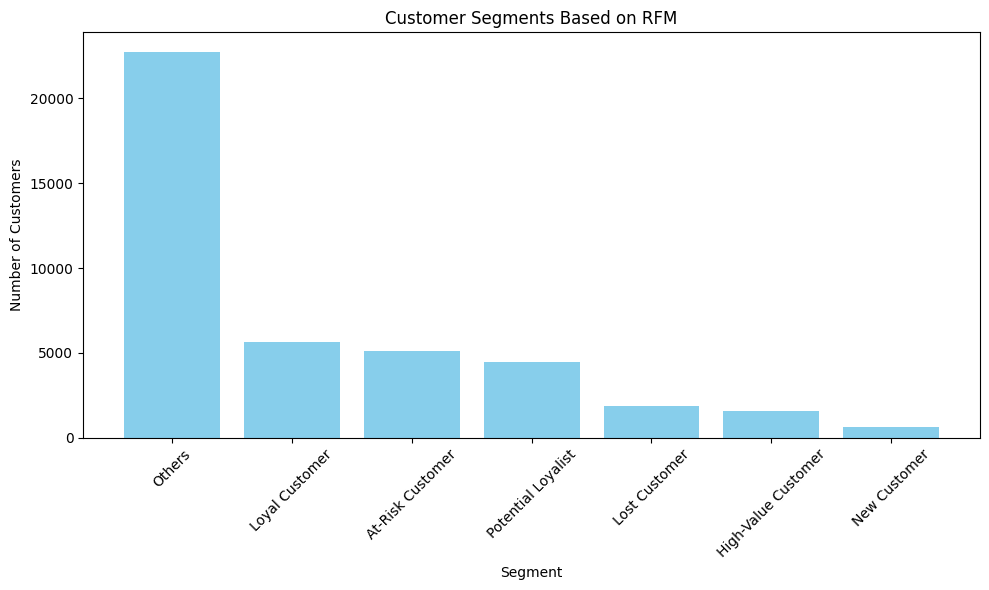

In [68]:
#Visualize the Segments
import matplotlib.pyplot as plt

# Bar chart for customer segments
plt.figure(figsize=(10, 6))
plt.bar(segment_counts['Segment'], segment_counts['Customer_Count'], color='skyblue')
plt.title('Customer Segments Based on RFM')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [69]:
# Display summary
print("Key Insights from RFM Segmentation:\n")
print("Total customers:", rfm.shape[0])
print("Most common segment:", segment_counts.iloc[0]['Segment'])
print("Least common segment:", segment_counts.iloc[-1]['Segment'])

Key Insights from RFM Segmentation:

Total customers: 42011
Most common segment: Others
Least common segment: New Customer


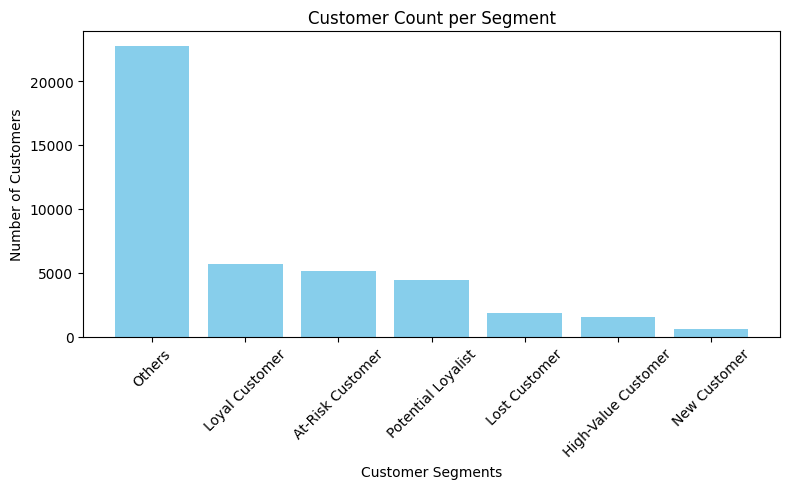

In [70]:
#Create Bar Charts for Segment Distribution
segment_counts = rfm['Segment'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(segment_counts.index, segment_counts.values, color='skyblue')
plt.xlabel("Customer Segments")
plt.ylabel("Number of Customers")
plt.title("Customer Count per Segment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

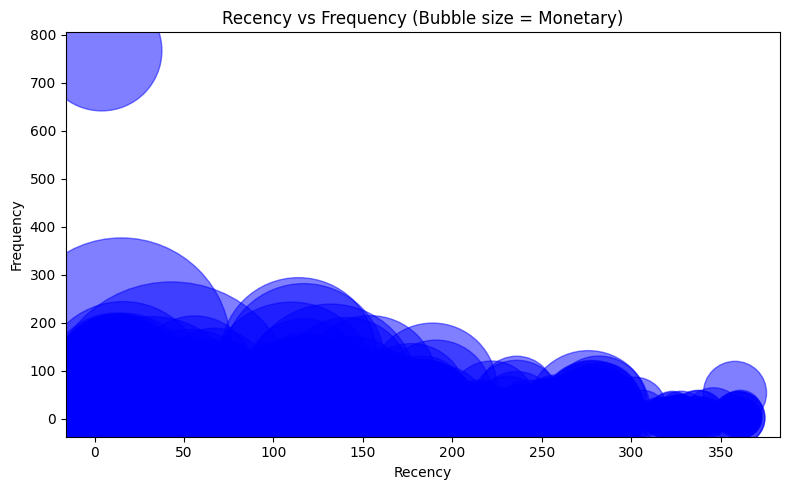

In [71]:
#Visualize Recency vs. Frequency vs. Monetary (RFM) Scores
plt.figure(figsize=(8, 5))
plt.scatter(rfm['Recency'], 
            rfm['Frequency'], 
            s=rfm['Monetary'] / 10,  
            c='blue', alpha=0.5)
plt.xlabel("Recency")
plt.ylabel("Frequency")
plt.title("Recency vs Frequency (Bubble size = Monetary)")
plt.tight_layout()
plt.show()

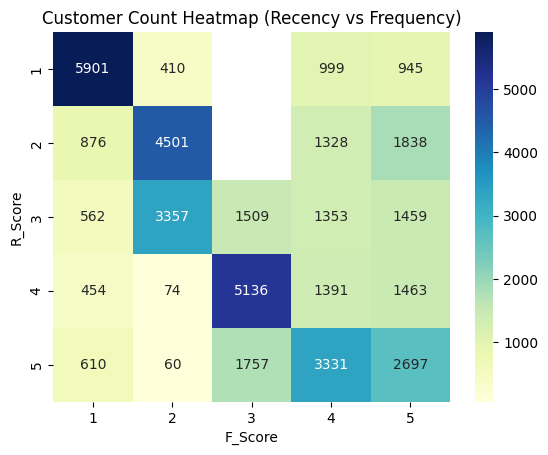

In [72]:
#Heatmap for RFM Distribution
import seaborn as sns

rfm['RFM_Combo'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str)

heatmap_data = rfm.groupby(['R_Score', 'F_Score']).size().unstack()
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt='g')
plt.title("Customer Count Heatmap (Recency vs Frequency)")
plt.show()


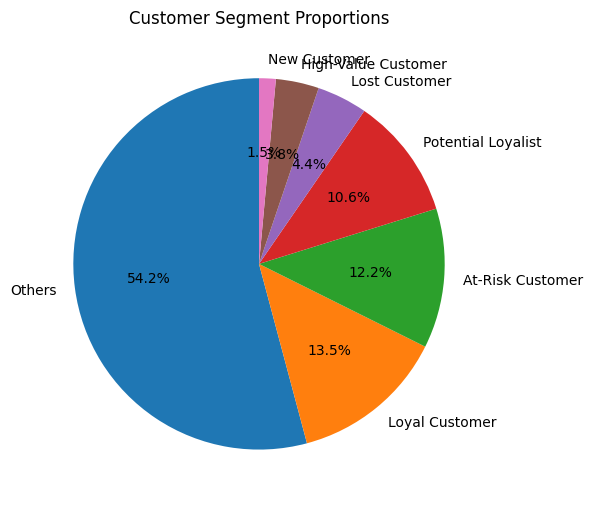

In [73]:
#Pie Charts for Segment Proportions
plt.figure(figsize=(6, 6))
plt.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Customer Segment Proportions")
plt.tight_layout()
plt.show()

In [74]:

rfm.to_csv("rfm_dataset.csv", index=False)


In [75]:
df.columns

Index(['Order_Id', 'Order_Date', 'Status', 'Item_Id', 'Sku', 'Qty_Ordered',
       'Price', 'Value', 'Discount_Amount', 'Total', 'Category',
       'Payment_Method', 'Bi_St', 'Cust_Id', 'Year', 'Month', 'Ref_Num',
       'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'Gender',
       'Age', 'Full_Name', 'E Mail', 'Sign In Date', 'Phone No.', 'Place Name',
       'County', 'City', 'State', 'Zip', 'Region', 'User Name',
       'Discount_Percent', 'Calculated_Total', 'Month_Year', 'Month_Num',
       'Month_Name'],
      dtype='object')

In [76]:
##########   Prepare Time Series Data         #############

In [77]:
# Extract & Format Date Information

df['Order_Date'] = pd.to_datetime(df['Order_Date'])

df['Year'] = df['Order_Date'].dt.year
df['Year'] = df['Order_Date'].dt.month
df['Year'] = df['Order_Date'].dt.isocalendar().week
df['Year'] = df['Order_Date'].dt.day

In [78]:
# Aggregate Sales Data by Date

daily_sales = df.groupby('Order_Date')['Total'].sum().reset_index()
print(daily_sales.head(5))

  Order_Date       Total
0 2020-10-01   54037.811
1 2020-10-02   35431.890
2 2020-10-03  104073.346
3 2020-10-04   27618.152
4 2020-10-05   61927.698


In [79]:
# Handle Missing or Incomplete Data

full_dates = pd.date_range(start=daily_sales['Order_Date'].min(),
                           end=daily_sales['Order_Date'].max())

daily_sales = daily_sales.set_index('Order_Date').reindex(full_dates).fillna(0)
daily_sales.index.name = 'Order_Date'
daily_sales = daily_sales.rename(columns={'Total': 'Total_Sales'})

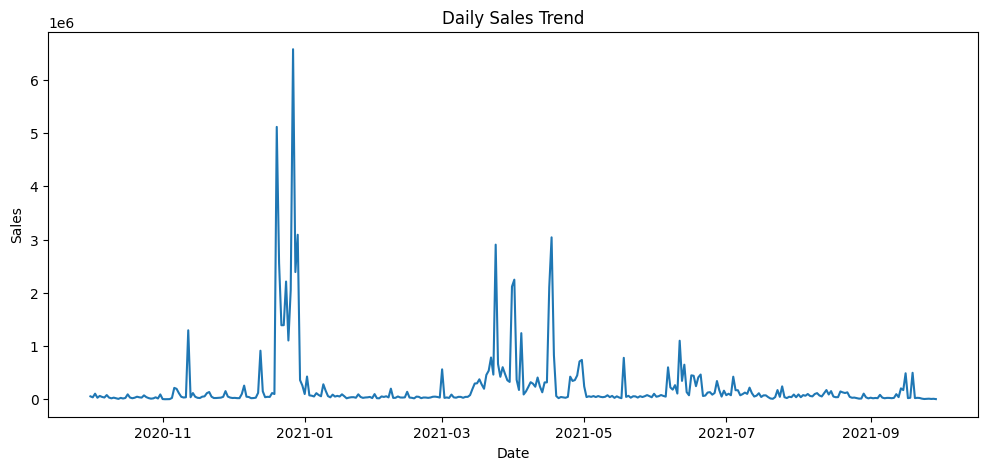

In [80]:
# Check for Data Trends & Seasonality

plt.figure(figsize=(12, 5))
plt.plot(daily_sales.index, daily_sales['Total_Sales'])
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [81]:
#  Ensure Data is Sorted and Indexed Properly

daily_sales = daily_sales.sort_index()

In [82]:
# Save the Processed Dataset for Analysis

daily_sales.to_csv("cleaned_sales_timeseries.csv")

In [83]:
df.columns

Index(['Order_Id', 'Order_Date', 'Status', 'Item_Id', 'Sku', 'Qty_Ordered',
       'Price', 'Value', 'Discount_Amount', 'Total', 'Category',
       'Payment_Method', 'Bi_St', 'Cust_Id', 'Year', 'Month', 'Ref_Num',
       'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'Gender',
       'Age', 'Full_Name', 'E Mail', 'Sign In Date', 'Phone No.', 'Place Name',
       'County', 'City', 'State', 'Zip', 'Region', 'User Name',
       'Discount_Percent', 'Calculated_Total', 'Month_Year', 'Month_Num',
       'Month_Name'],
      dtype='object')

In [84]:
from prophet import Prophet
from prophet.plot import plot_plotly
import plotly.io as pio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pio.renderers.default = 'notebook_connected'

df = pd.read_csv("cleaned_sales_timeseries.csv")

df.columns = df.columns.str.strip()
df.rename(columns={'Order_Date': 'ds', 'Total_Sales': 'y'}, inplace=True)

df['ds'] = pd.to_datetime(df['ds'], format='mixed', dayfirst=True)
df['y'] = pd.to_numeric(df['y'], errors='coerce')
df.dropna(subset=['y'], inplace=True)

df = df.groupby('ds').sum().reset_index()

df['y'] = np.log1p(df['y'])

model = Prophet()
model.fit(df)

future = model.make_future_dataframe(periods=6, freq='MS')

forecast = model.predict(future)

forecast['yhat'] = np.expm1(forecast['yhat'])
forecast['yhat_lower'] = np.expm1(forecast['yhat_lower'])
forecast['yhat_upper'] = np.expm1(forecast['yhat_upper'])

plot_plotly(model, forecast).show()

latest_date = df['ds'].max()
future_forecast = forecast[forecast['ds'] > latest_date][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

future_forecast['yhat'] = future_forecast['yhat'].apply(lambda x: f"₹{x:,.0f}")
future_forecast['yhat_lower'] = future_forecast['yhat_lower'].apply(lambda x: f"₹{x:,.0f}")
future_forecast['yhat_upper'] = future_forecast['yhat_upper'].apply(lambda x: f"₹{x:,.0f}")

print(" Future Monthly Sales Forecast:\n")
print(future_forecast)

13:37:42 - cmdstanpy - INFO - Chain [1] start processing
13:37:42 - cmdstanpy - INFO - Chain [1] done processing


 Future Monthly Sales Forecast:

            ds     yhat yhat_lower yhat_upper
364 2021-10-01  ₹32,741     ₹6,848   ₹191,834
365 2021-11-01  ₹18,711     ₹3,919   ₹117,576
366 2021-12-01  ₹15,376     ₹2,879    ₹78,492
367 2022-01-01  ₹15,868     ₹3,135    ₹89,840
368 2022-02-01   ₹6,655     ₹1,144    ₹37,068
369 2022-03-01   ₹5,065       ₹949    ₹27,809


In [85]:
#seasonal effects

from prophet import Prophet
from prophet.plot import plot_plotly
import plotly.io as pio
import pandas as pd
import numpy as np

pio.renderers.default = 'notebook_connected'

df = pd.read_csv("cleaned_sales_timeseries.csv")
df.columns = df.columns.str.strip()
df.rename(columns={'Order_Date': 'ds', 'Total_Sales': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'], format='mixed', dayfirst=True)
df['y'] = pd.to_numeric(df['y'], errors='coerce')
df.dropna(subset=['y'], inplace=True)
df = df.groupby('ds').sum().reset_index()
df['y'] = np.log1p(df['y'])

diwali_dates = pd.DataFrame({
    'holiday': 'diwali',
    'ds': pd.to_datetime([
        '2020-11-14',
        '2021-11-04',
        '2022-10-24',
        '2023-11-12',
        '2024-11-01',
        '2025-10-20'
    ]),
    'lower_window': -2,
    'upper_window': 2
})

model = Prophet(holidays=diwali_dates)
model.fit(df)

future = model.make_future_dataframe(periods=6, freq='MS')
forecast = model.predict(future)

forecast['yhat'] = np.expm1(forecast['yhat'])
forecast['yhat_lower'] = np.expm1(forecast['yhat_lower'])
forecast['yhat_upper'] = np.expm1(forecast['yhat_upper'])

plot_plotly(model, forecast).show()

latest_date = df['ds'].max()
future_forecast = forecast[forecast['ds'] > latest_date][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

future_forecast['yhat'] = future_forecast['yhat'].apply(lambda x: f"₹{x:,.0f}")
future_forecast['yhat_lower'] = future_forecast['yhat_lower'].apply(lambda x: f"₹{x:,.0f}")
future_forecast['yhat_upper'] = future_forecast['yhat_upper'].apply(lambda x: f"₹{x:,.0f}")

print("Future Monthly Sales Forecast with Diwali:")
print(future_forecast)


13:37:44 - cmdstanpy - INFO - Chain [1] start processing
13:37:44 - cmdstanpy - INFO - Chain [1] done processing


Future Monthly Sales Forecast with Diwali:
            ds     yhat yhat_lower yhat_upper
364 2021-10-01  ₹33,044     ₹7,684   ₹172,781
365 2021-11-01  ₹18,851     ₹4,253    ₹99,765
366 2021-12-01  ₹15,325     ₹2,859    ₹85,782
367 2022-01-01  ₹15,458     ₹2,753    ₹86,475
368 2022-02-01   ₹6,583     ₹1,067    ₹35,472
369 2022-03-01   ₹4,991     ₹1,024    ₹26,840


In [86]:
######   Predict Future Sales      ########

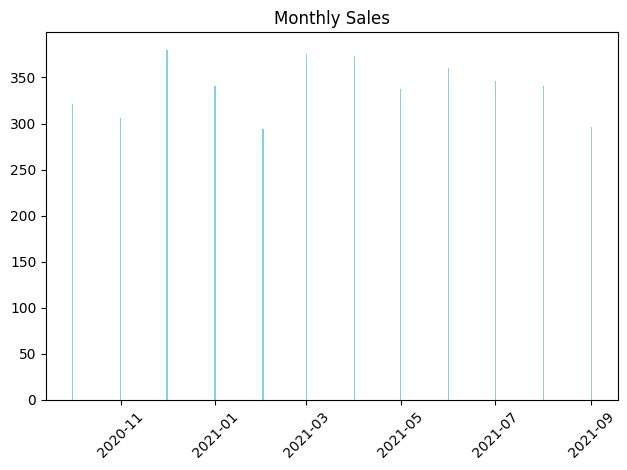

In [87]:
#Bar Chart – Total Sales by Month

df['ds'] = pd.to_datetime(df['ds'])

monthly = df.groupby(df['ds'].dt.to_period('M'))['y'].sum().reset_index()
monthly['ds'] = monthly['ds'].dt.to_timestamp()

plt.bar(monthly['ds'], monthly['y'], color='skyblue')
plt.title('Monthly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

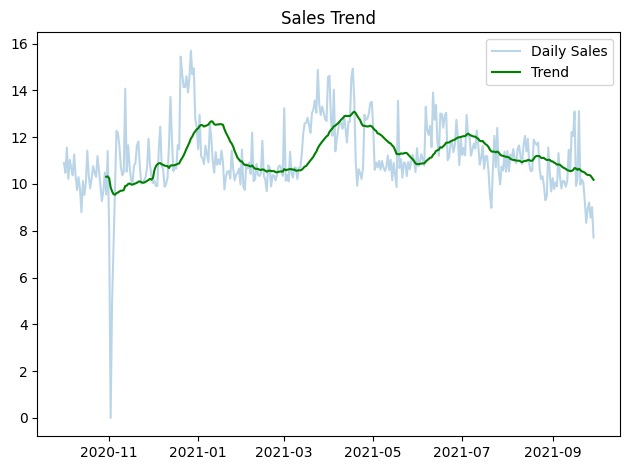

In [88]:
#Trend Line – Long-Term Sales Trend

df['trend'] = df['y'].rolling(window=30).mean()

plt.plot(df['ds'], df['y'], label='Daily Sales', alpha=0.3)
plt.plot(df['ds'], df['trend'], label='Trend', color='green')
plt.legend()
plt.title('Sales Trend')
plt.tight_layout()
plt.show()

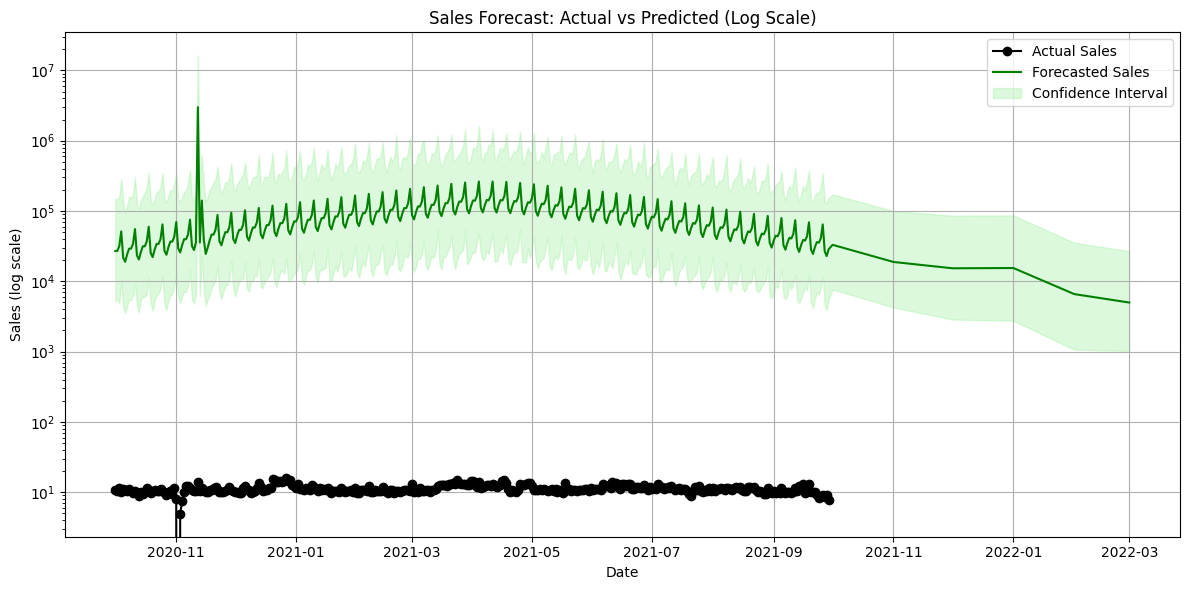

In [89]:
#Visualize the Forecasted Sales Trends

plt.figure(figsize=(12, 6))

plt.plot(df['ds'], df['y'], label='Actual Sales', color='black', marker='o')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Sales', color='green')

plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'],
                 color='lightgreen', alpha=0.3, label='Confidence Interval')

plt.title("Sales Forecast: Actual vs Predicted (Log Scale)")
plt.xlabel("Date")
plt.ylabel("Sales (log scale)")
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [90]:
#Validate the Forecast Accuracy

merged = pd.merge(df, forecast[['ds', 'yhat']], on='ds', how='inner')

merged.dropna(subset=['y', 'yhat'], inplace=True)

squared_errors = (merged['y'] - merged['yhat']) ** 2
rmse = np.sqrt(squared_errors.mean())


non_zero = merged['y'] != 0
mape = (np.abs((merged['y'] - merged['yhat']) / merged['y']))[non_zero].mean() * 100

print("\nForecast Accuracy Check:")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

if mape < 10:
    print("Excellent accuracy!")
elif mape < 20:
    print("Good accuracy, can be improved.")
else:
    print("Accuracy is low — try tuning the model.")


Forecast Accuracy Check:
RMSE: 184397.78
MAPE: 791939.76%
Accuracy is low — try tuning the model.


In [91]:
#Analyze Business Implications
#Document expected sales growth or decline over the forecasted period.

latest_date = df['ds'].max()
future_data = forecast[forecast['ds'] > latest_date][['ds', 'yhat']].reset_index(drop=True)

future_data['change'] = future_data['yhat'].diff()

def sales_summary(change):
    if pd.isna(change):
        return "First forecast month – monitor closely"
    elif change > 0:
        return "Sales expected to grow – increase stock & marketing"
    elif change < 0:
        return "Sales drop – plan offers or ads"
    else:
        return "No major change – stable sales"

future_data['Summary'] = future_data['change'].apply(sales_summary)

print("\nMonthly Sales Forecast & Business Insight:\n")
for i, row in future_data.iterrows():
    month = row['ds'].strftime('%B %Y')
    sales = f"₹{row['yhat']:,.0f}"
    summary = row['Summary']
    print(f"{month}: {sales} → {summary}")


Monthly Sales Forecast & Business Insight:

October 2021: ₹33,044 → First forecast month – monitor closely
November 2021: ₹18,851 → Sales drop – plan offers or ads
December 2021: ₹15,325 → Sales drop – plan offers or ads
January 2022: ₹15,458 → Sales expected to grow – increase stock & marketing
February 2022: ₹6,583 → Sales drop – plan offers or ads
March 2022: ₹4,991 → Sales drop – plan offers or ads


In [92]:
#Updated Forecast Dataset (CSV)

future_forecast.to_csv("future_sales_forecast.csv", index=False)

In [93]:
#########  Business Insights and Recommendations           ############

In [94]:
###### Identify Business Opportunities         #########

In [95]:
df = pd.read_csv("cleaned_data.csv")

In [96]:
df.columns

Index(['Order_Id', 'Order_Date', 'Status', 'Item_Id', 'Sku', 'Qty_Ordered',
       'Price', 'Value', 'Discount_Amount', 'Total', 'Category',
       'Payment_Method', 'Bi_St', 'Cust_Id', 'Year', 'Month', 'Ref_Num',
       'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'Gender',
       'Age', 'Full_Name', 'E Mail', 'Sign In Date', 'Phone No.', 'Place Name',
       'County', 'City', 'State', 'Zip', 'Region', 'User Name',
       'Discount_Percent', 'Calculated_Total'],
      dtype='object')

       Month            Category         Total
0    2020-10          appliances  147309.86906
1    2020-10   beauty & grooming   76840.89145
2    2020-10               books     598.48500
3    2020-10           computing   21085.44700
4    2020-10       entertainment  116356.75900
..       ...                 ...           ...
175  2021-09              others     377.50000
176  2021-09  school & education    3878.35000
177  2021-09             soghaat   14063.35900
178  2021-09          superstore  168438.23000
179  2021-09     women's fashion  175724.35300

[180 rows x 3 columns]


<Axes: title={'center': 'Sales Trend by Product Category'}, xlabel='Month'>

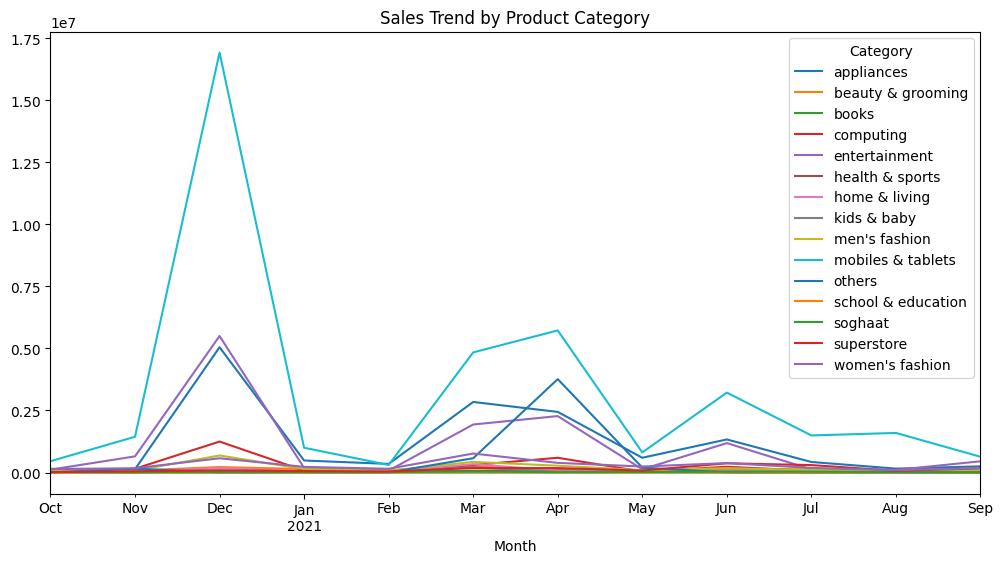

In [97]:
#Analyze High-Growth Product Categories

df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Month'] = df['Order_Date'].dt.to_period('M')

# Group by Month and Category to analyze sales trends
prod_category = df.groupby(['Month', 'Category'])['Total'].sum().reset_index()
print(prod_category)

pivot_df = prod_category.pivot(index='Month', columns='Category', values='Total')

# Plot
pivot_df.plot(figsize=(12, 6), title='Sales Trend by Product Category')


      Region         Total
2      South  3.169706e+07
0    Midwest  2.203162e+07
3       West  1.565295e+07
1  Northeast  1.486988e+07


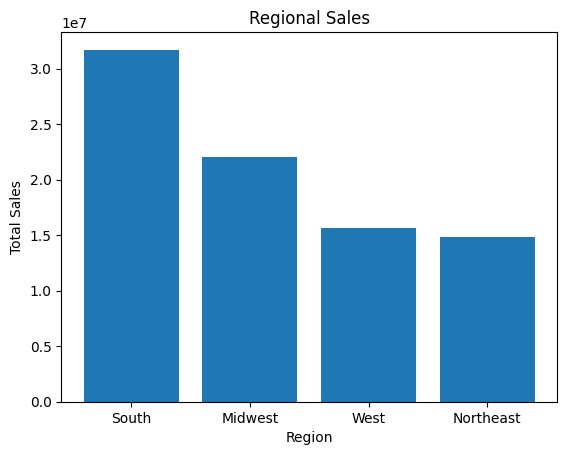

In [98]:
#Identify Regional Sales Growth Areas

regional_sales = df.groupby('Region')['Total'].sum().reset_index().sort_values(by='Total', ascending=False)
print(regional_sales)

plt.bar(regional_sales['Region'], regional_sales['Total'])
plt.title('Regional Sales')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

In [99]:
#Understand Customer Behavior for Upselling & Cross-Selling

top_customers = rfm[rfm['RFM_Score'].isin(['555', '554', '545', '544'])]
print(top_customers)

       CustomerID  Recency  Frequency   Monetary  R_Score  F_Score  M_Score  \
0               4       17         15  21282.350        5        5        5   
2              20       64          6  22565.600        5        5        5   
6              32       13         97  47835.190        5        5        5   
7              33       47         49  32907.731        5        5        5   
9              44      111          3   4143.379        5        4        5   
...           ...      ...        ...        ...      ...      ...      ...   
41964      115142        5          1    825.000        5        4        4   
41969      115152        5          1   1049.900        5        4        4   
42001      115237        3          1   1229.900        5        4        4   
42003      115245        3          1   1237.500        5        4        4   
42007      115256        2          1   1452.700        5        4        4   

      RFM_Score              Segment RFM_Combo  
0 

In [100]:
df.columns = df.columns.str.strip()  

top_customer_ids = top_customers['CustomerID']
top_txns = df[df['Cust_Id'].isin(top_customer_ids)]
print(top_txns)

         Order_Id Order_Date    Status  Item_Id                        Sku  \
15      100354697 2020-10-01  received   574803  Essentials_EDFH1032CGM-XL   
16      100354697 2020-10-01  received   574805                 mytee_6-XL   
17      100354697 2020-10-01  received   574807        SC_5e-XL (46 to 48)   
18      100357662 2020-10-17  received   580164        MATBIS59ACAAF2C617C   
19      100357662 2020-10-17  received   580165        BAGSAM59AC839CE9231   
...           ...        ...       ...      ...                        ...   
140168  100561816 2021-09-26  received   904141        MATINF5A61FBB621160   
140213  100562102 2021-09-28  received   904696        MATHUA5A61A5B71991A   
140216  100562106 2021-09-28  received   904700        BAGNAB59BB02AE76B65   
140220  100562148 2021-09-29  received   904774        APPPHI59E0BB7CDCB10   
140221  100562148 2021-09-29  received   904775         COMHP5B69D9E3B7CB5   

        Qty_Ordered   Price   Value  Discount_Amount   Total  .

In [101]:
basket = top_txns.groupby('Order_Id')['Item_Id'].apply(list).reset_index()
print(basket.head())

    Order_Id                                   Item_Id
0  100354697                  [574803, 574805, 574807]
1  100354743  [574899, 574900, 574901, 574902, 574903]
2  100354769                  [574961, 574962, 574963]
3  100354787                                  [574989]
4  100354824                          [575050, 575051]


In [105]:
#datset download
rfm = pd.read_csv("rfm_dataset.csv")
forecast = pd.read_csv("future_sales_forecast.csv")

with pd.ExcelWriter("combined_data.xlsx", engine='openpyxl') as writer:
    rfm.to_excel(writer, sheet_name="RFM_Segmentation", index=False)
    forecast.to_excel(writer, sheet_name="Sales_Forecast", index=False)

print("combined_data.xlsx created successfully.")

combined_data.xlsx created successfully.
